Can I predict which parameters will be bad?

I might not have enough data for this.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
func_vals_b = np.load('6_17_barrier/func_vals.npy')
x_iters_b = np.load('6_17_barrier/x_iters.npy')
roi_list = ['PTV 4/7/20', 'Lungs', 'SpinalCord (Thorax)', 'Esophagus', 'Heart']

In [10]:
x_good = x_iters_b[func_vals_b < 1e6]
ptv_good = [x_good[ii][0] for ii in range(len(x_good))]
lungs_good = [x_good[ii][1] for ii in range(len(x_good))]
cord_good = [x_good[ii][2] for ii in range(len(x_good))]
esoph_good = [x_good[ii][3] for ii in range(len(x_good))]
heart_good = [x_good[ii][4] for ii in range(len(x_good))]

In [11]:
x_bad = x_iters_b[func_vals_b == 1e6]
ptv_bad = [x_bad[ii][0] for ii in range(len(x_bad))]
lungs_bad = [x_bad[ii][1] for ii in range(len(x_bad))]
cord_bad = [x_bad[ii][2] for ii in range(len(x_bad))]
esoph_bad = [x_bad[ii][3] for ii in range(len(x_bad))]
heart_bad = [x_bad[ii][4] for ii in range(len(x_bad))]

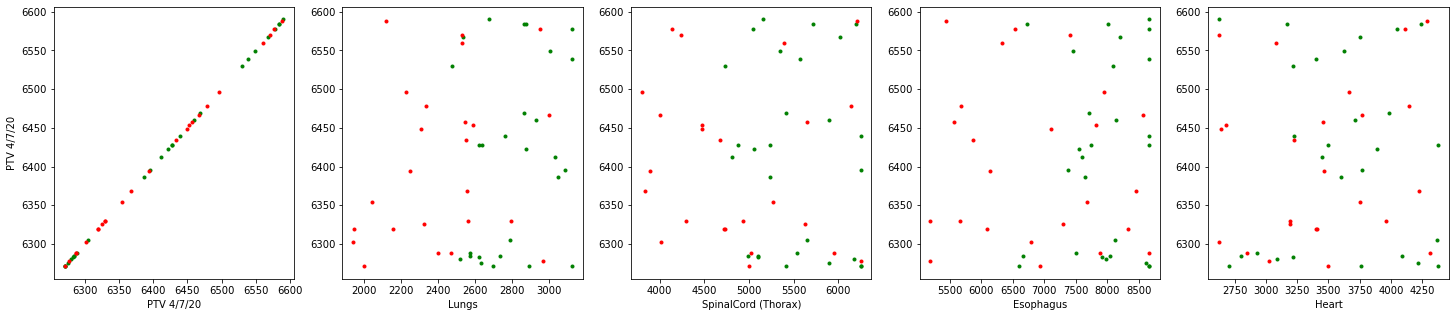

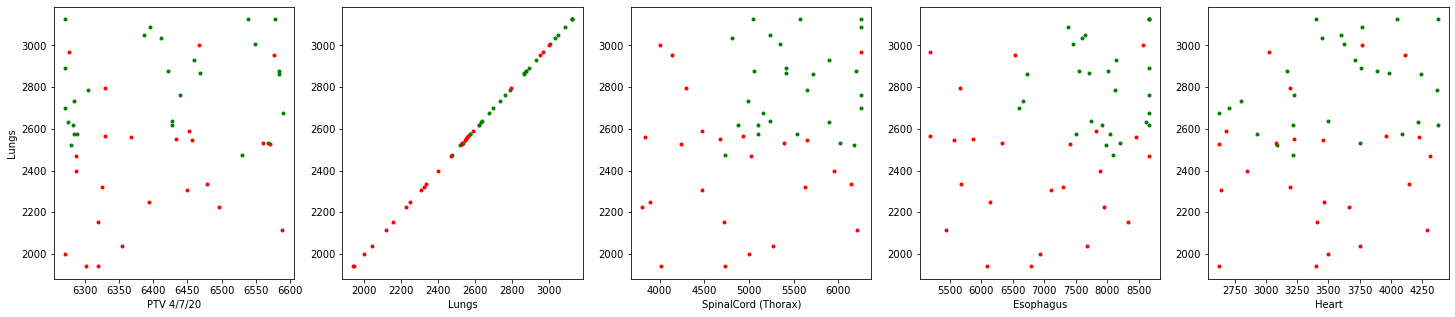

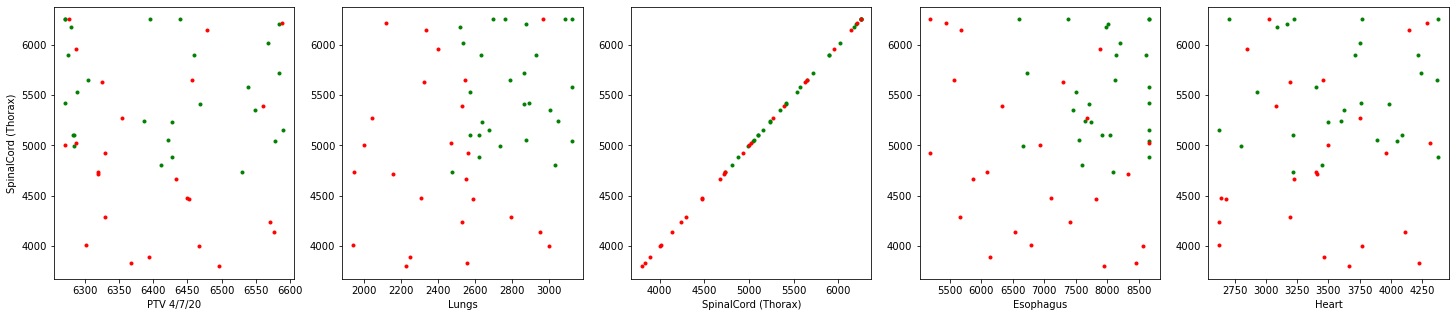

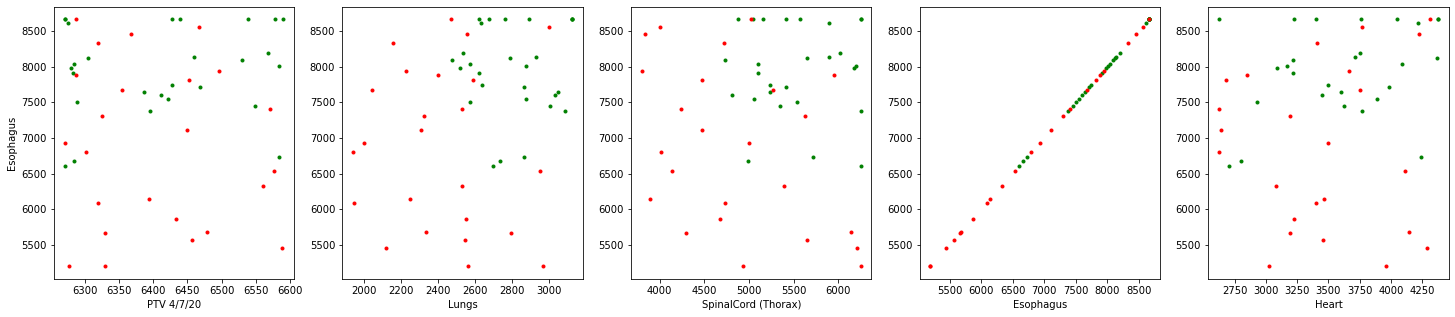

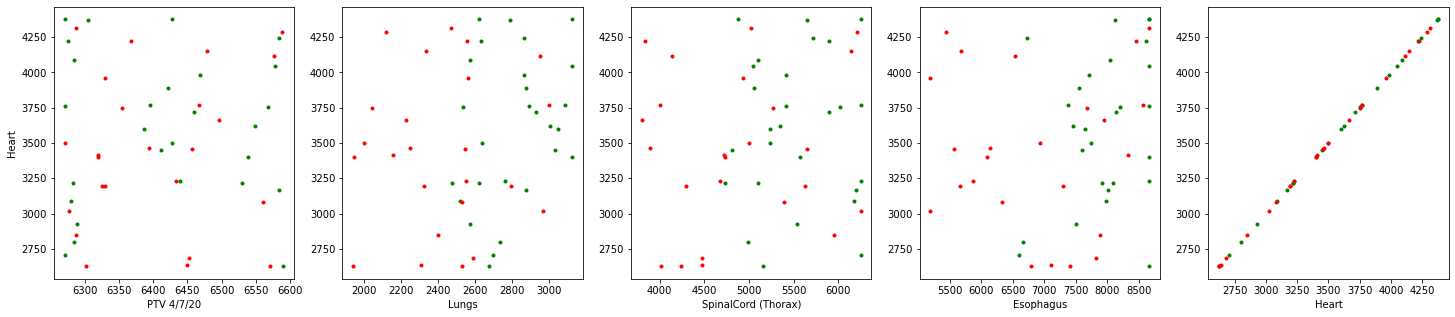

In [16]:
for ii in range(5):
    fig, ax = plt.subplots(1, 5, figsize=(25, 5))
    ax[0].set_ylabel(roi_list[ii])
    yg = [x_good[kk][ii] for kk in range(len(x_good))]
    yb = [x_bad[kk][ii] for kk in range(len(x_bad))]
    for jj in range(5):
        xg = [x_good[kk][jj] for kk in range(len(x_good))]
        xb = [x_bad[kk][jj] for kk in range(len(x_bad))]
        ax[jj].plot(xg, yg, 'g.')
        ax[jj].plot(xb, yb, 'r.')
        ax[jj].set_xlabel(roi_list[jj])

In [36]:
U, S, Vh = np.linalg.svd(x_iters_b, full_matrices=False)

In [35]:
np.linalg.svd?

Text(0, 0.5, 'Percent Energy')

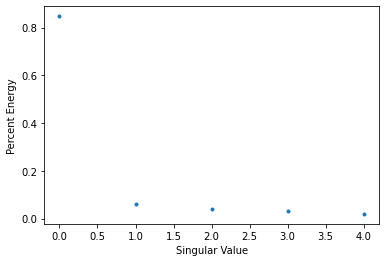

In [22]:
plt.plot(S/sum(S), '.')
plt.xlabel('Singular Value')
plt.ylabel('Percent Energy')

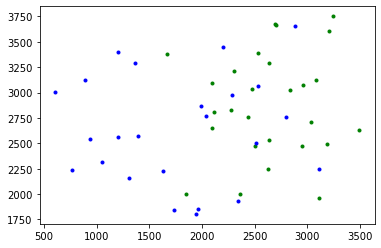

In [45]:
p_good = x_good.dot(Vh[:, 0:2])
p_bad = x_bad.dot(Vh[:, 0:2])
plt.plot(p_good[:, 0], p_good[:, 1], 'g.')
plt.plot(p_bad[:, 0], p_bad[:, 1], 'b.')

In [46]:
# Didn't normalize anything, so might just be picking out the stuff with wider ranges...

array([-0.53405607, -0.23668016,  0.42135064,  0.65599503, -0.22561201])

In [47]:
Vh[:, 1]

array([-0.21944382, -0.07655694,  0.06512789,  0.08438437,  0.96675802])

In [40]:
Vh.shape

(5, 5)